In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [5]:

# Set the theme in Seaborn
sns.set_theme(style="darkgrid", font="Arial", font_scale=1.5)

# Set the font size in Matplotlib
plt.rcParams.update({'font.size': 15})

# Set the background style in Matplotlib
plt.rcParams['axes.facecolor'] = 'black'

matplotlib.rcParams.update({'font.size': 15})
plt.style.use('dark_background')

In [6]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [29]:
#Read the CSV file and store it in the 'df' variable
df = pd.read_csv("predictive_maintenance.csv")

#Drop the 'Unique ID' and 'Product ID' columns from the dataframe
df = df.drop(["UDI","Product ID"], axis=1)

#Select a random sample of 10 rows from the dataframe
df.sample(10)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
6312,M,300.9,310.2,1533,38.1,137,0,No Failure
4049,L,301.8,310.8,1505,41.2,33,0,No Failure
529,L,297.6,309.5,1569,36.2,63,0,No Failure
8509,M,298.4,309.7,1870,22.5,170,0,No Failure
1989,L,298.2,307.9,1785,23.4,181,0,No Failure
9753,L,298.5,309.8,1593,35.1,203,0,No Failure
2218,L,299.7,309.1,1713,33.5,141,0,No Failure
1910,H,298.0,307.7,1547,36.8,186,0,No Failure
9825,L,298.4,309.2,1610,32.4,194,0,No Failure
5066,L,304.1,313.1,1550,30.9,9,0,No Failure


In [30]:
## Converting temperature in centigrate from Kelvin [0K = -273.15 °C  ] 
df["Air temperature [K]"] = df["Air temperature [K]"] - 273.15
df["Process temperature [K]"] = df["Process temperature [K]"] - 273.15

# Renaming temperature in Centigrate(°C) from Kelvin (K)
df.rename(columns={"Air temperature [K]" : "Air temperature [°C]","Process temperature [K]" : "Process temperature [°C]"},inplace=True)

In [31]:
df["Temperature difference [°C]"] = df["Process temperature [°C]"] - df["Air temperature [°C]"]
df.sample(5)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
4446,L,29.35,37.15,1584,35.5,158,0,No Failure,7.8
2896,M,27.55,36.35,1633,31.3,90,0,No Failure,8.8
5994,L,27.45,37.25,1608,39.2,221,0,No Failure,9.8
1200,M,23.75,34.85,1430,55.9,71,0,No Failure,11.1
1069,M,23.75,34.65,1840,24.6,157,0,No Failure,10.9


In [32]:
display(df.shape)
display(df.size)
df.info() 

(10000, 9)

90000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Type                         10000 non-null  object 
 1   Air temperature [°C]         10000 non-null  float64
 2   Process temperature [°C]     10000 non-null  float64
 3   Rotational speed [rpm]       10000 non-null  int64  
 4   Torque [Nm]                  10000 non-null  float64
 5   Tool wear [min]              10000 non-null  int64  
 6   Target                       10000 non-null  int64  
 7   Failure Type                 10000 non-null  object 
 8   Temperature difference [°C]  10000 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 703.2+ KB


In [35]:
df.describe().round(3)


,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Temperature difference [°C]
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,26.855,36.856,1538.776,39.987,107.951,0.034,10.001
std,2.000,1.484,179.284,9.969,63.654,0.181,1.001
min,22.150,32.550,1168.000,3.800,0.000,0.000,7.600
25%,25.150,35.650,1423.000,33.200,53.000,0.000,9.300
50%,26.950,36.950,1503.000,40.100,108.000,0.000,9.800
75%,28.350,37.950,1612.000,46.800,162.000,0.000,11.000
max,31.350,40.650,2886.000,76.600,253.000,1.000,12.100


In [36]:
for col in df[['Type','Target','Failure Type']]:
    print(df[col].value_counts()) 
    print("****"*8)

L    6000
M    2997
H    1003
Name: Type, dtype: int64
********************************
0    9661
1     339
Name: Target, dtype: int64
********************************
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64
********************************


In [39]:
from sklearn.model_selection import train_test_split
x = df[['Air temperature [°C]', 'Process temperature [°C]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Temperature difference [°C]']]
#y = df[['Target', 'Failure Type']]
y = df['Target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [40]:
print("Shape of df:", df.shape)
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of df: (10000, 9)
Shape of x_train: (8000, 6)
Shape of x_test: (2000, 6)
Shape of y_train: (8000,)
Shape of y_test: (2000,)


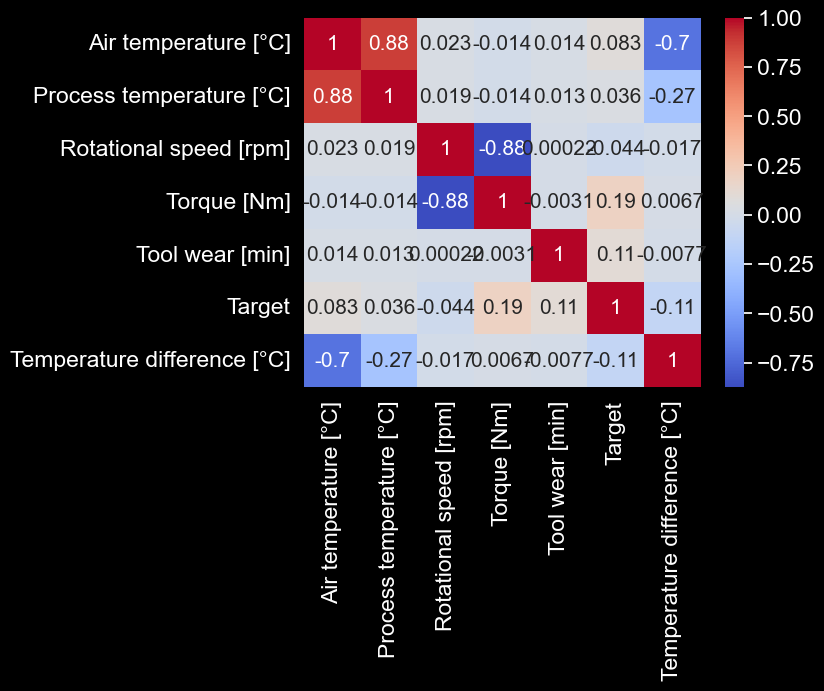

In [42]:

# Correlation heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

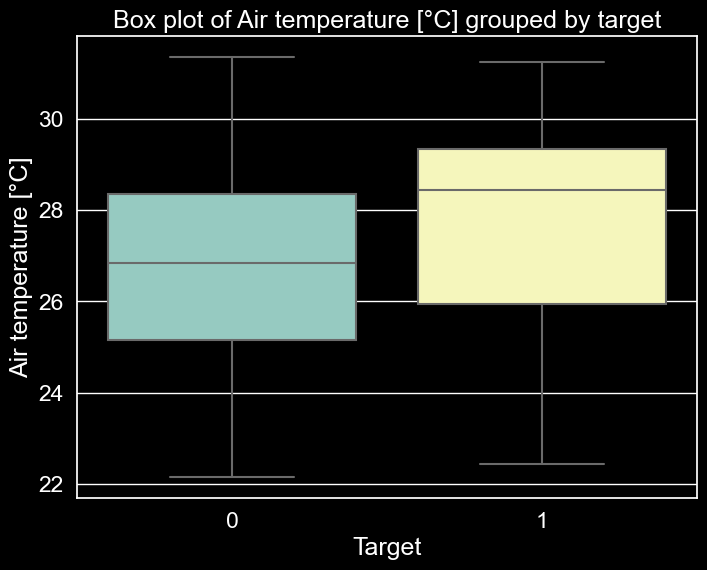

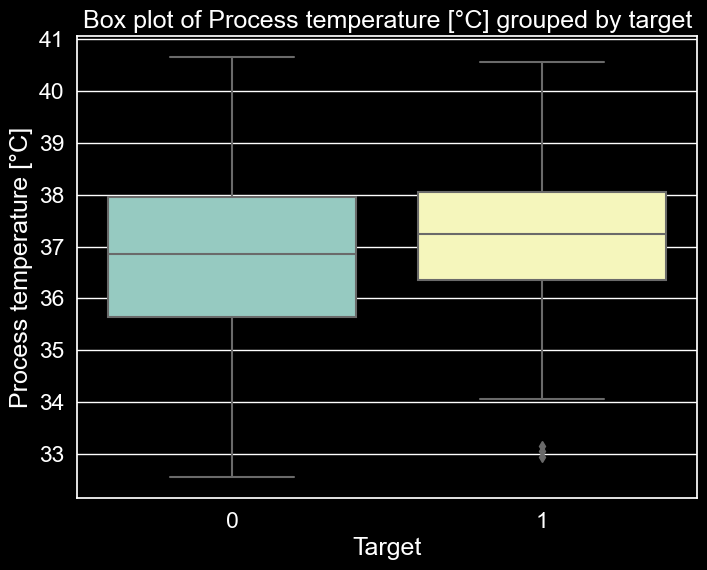

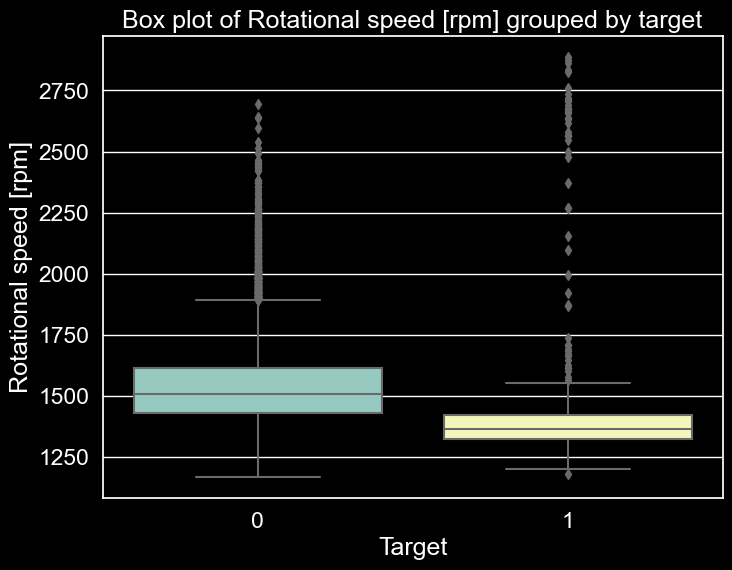

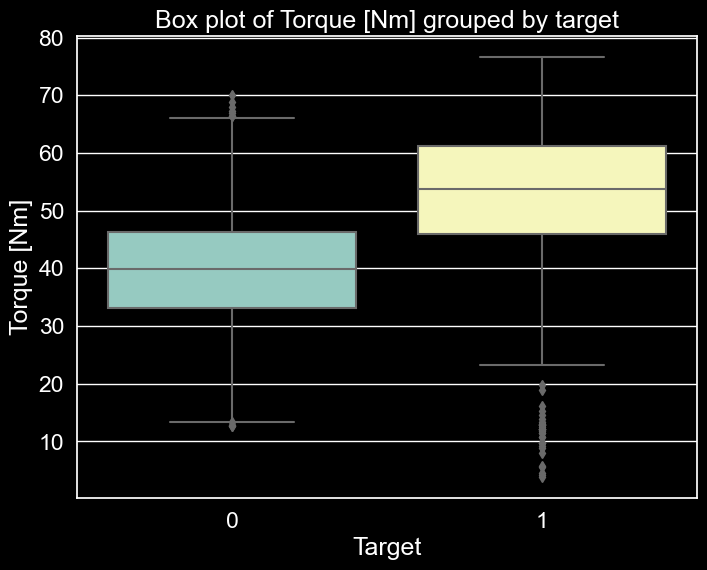

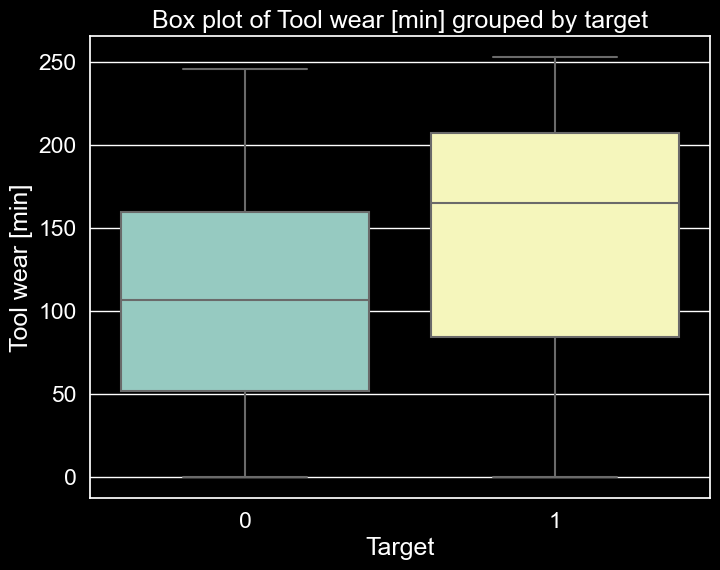

In [49]:
# Box plot of features grouped by target
for col in df.columns:
    if col != 'Target' and col != 'Failure Type' and col != 'Type' and col != 'Temperature difference [°C]':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='Target', y=col, data=df)
        plt.title(f'Box plot of {col} grouped by target')
        plt.show()

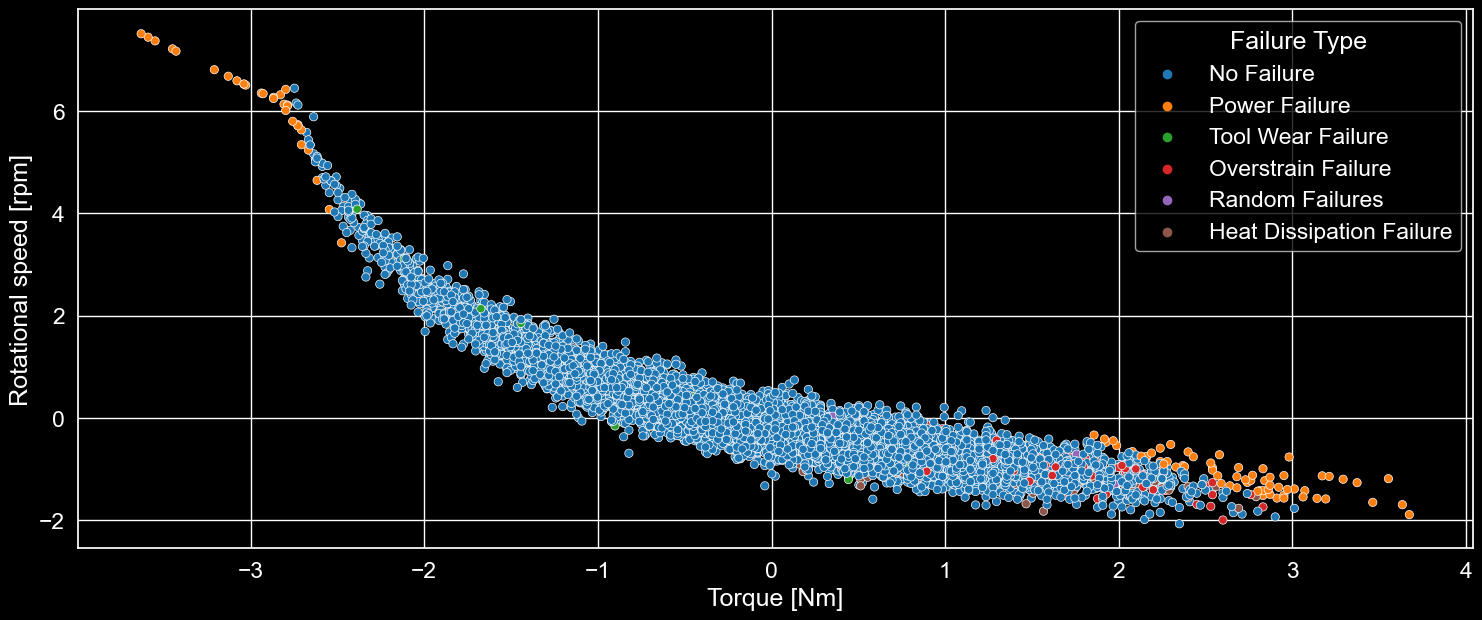

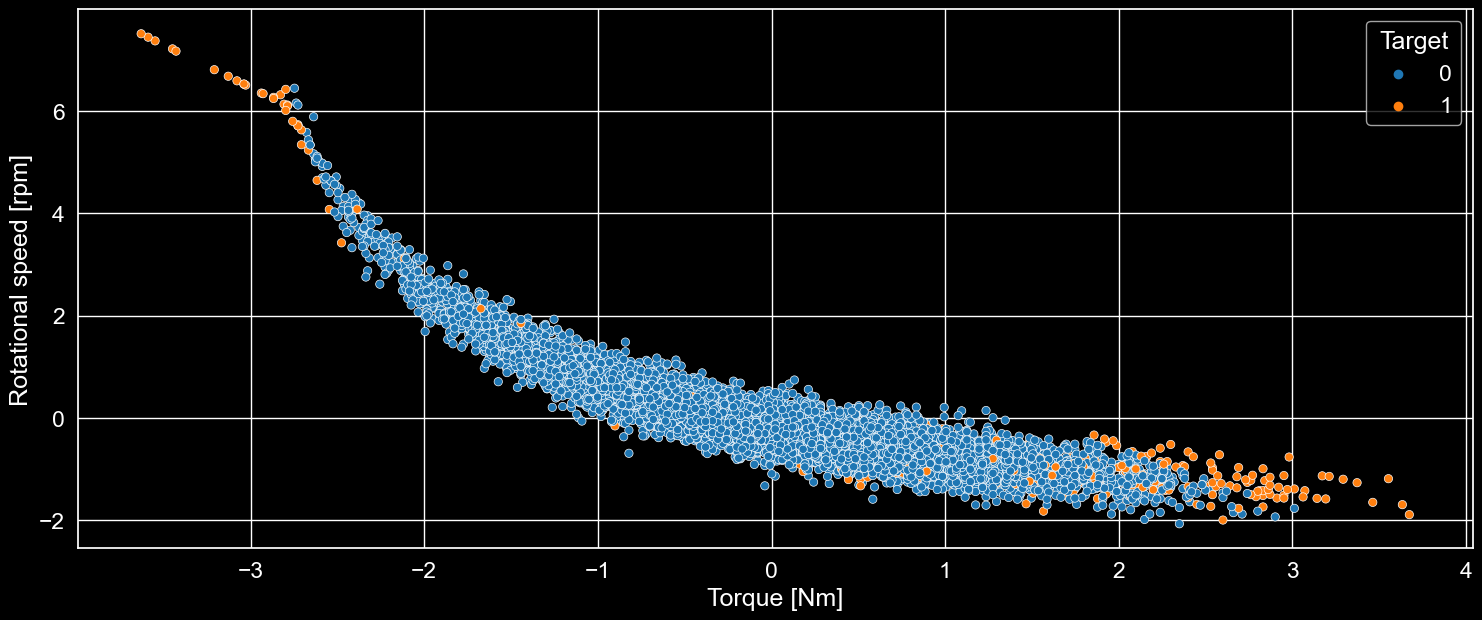

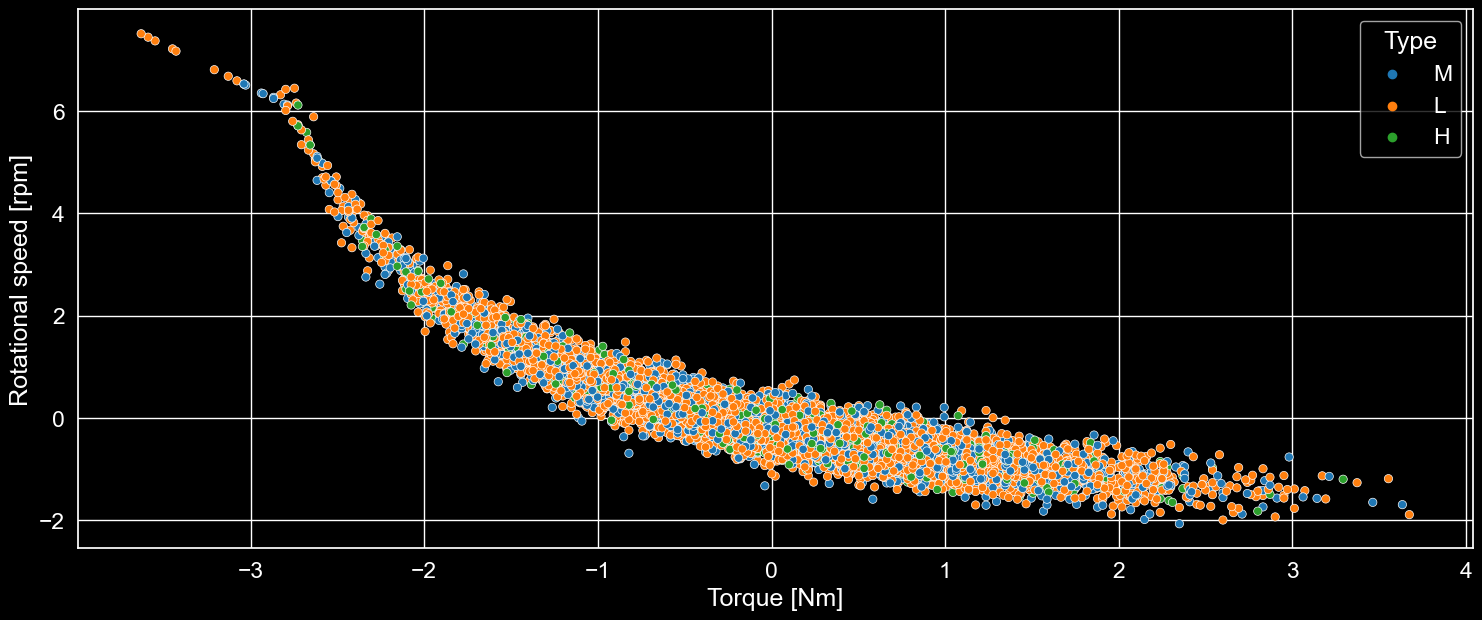

In [53]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",palette="tab10");
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Target",palette="tab10");
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Type",palette="tab10");

In [54]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['Air temperature [°C]', 'Process temperature [°C]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
# Assuming 'numerical_cols' is a list of numerical column names
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

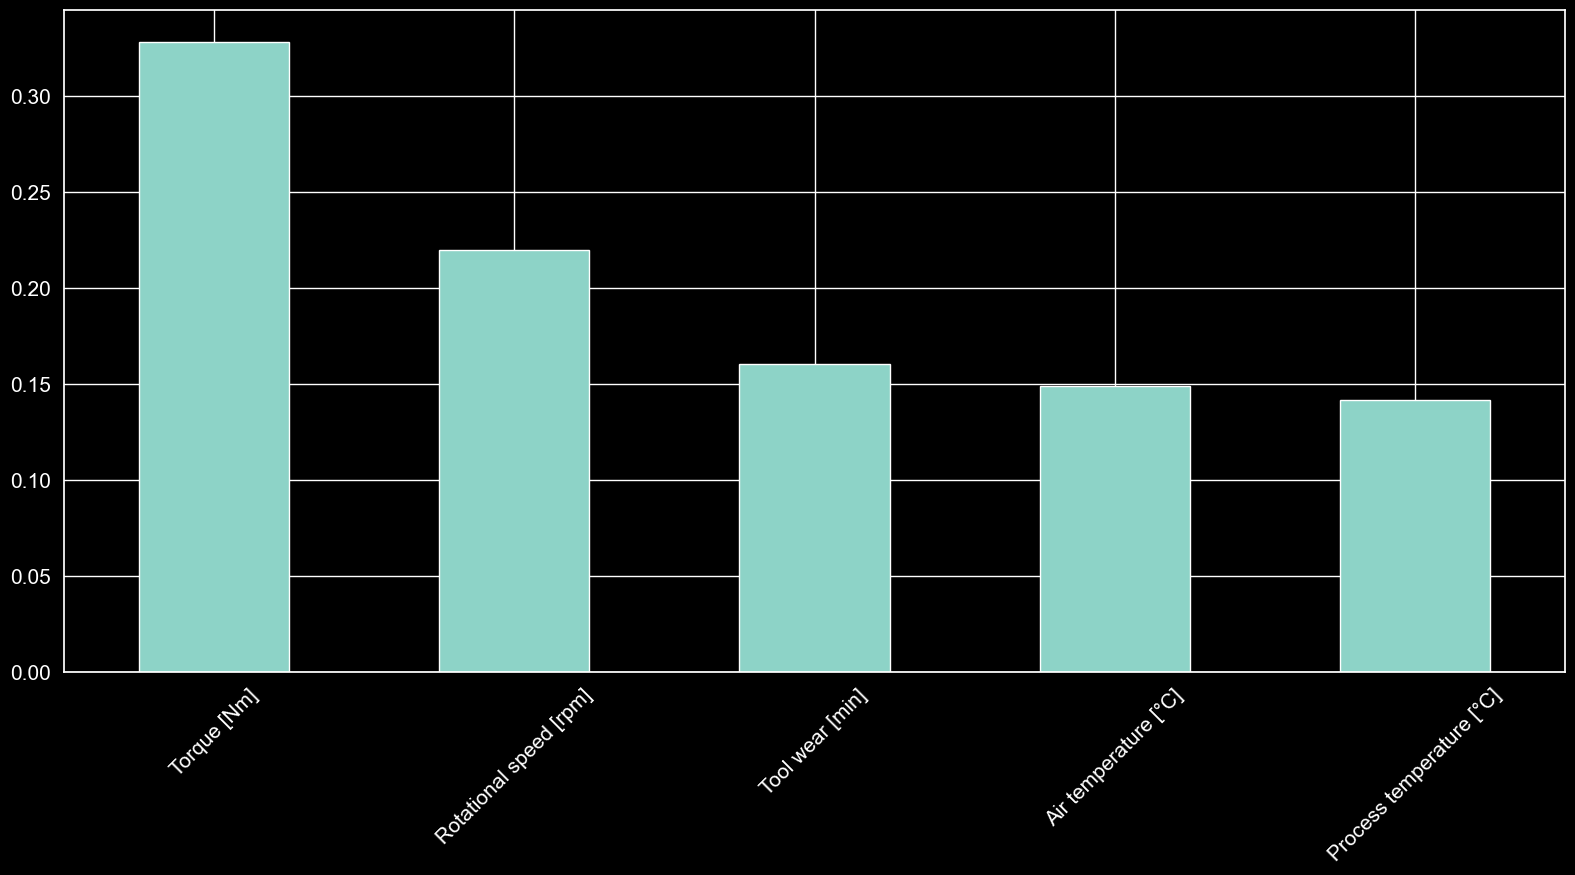

In [55]:
from sklearn.ensemble import RandomForestClassifier


X = df.drop(['Target', 'Failure Type', 'Type', 'Temperature difference [°C]'], axis=1)
y = df['Target']

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)

# Get feature importances
importances = clf.feature_importances_

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X.columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()